In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# long array
x = np.linspace(0, 100, 100)
y = x * 3

In [10]:
def mse(x_true, x_pred):
    return np.mean((x_true - x_pred) ** 2)


In [ ]:
# n epochs
n = 5
lr = 0.0001


# randomly initialize k
k = 4

history = {"epochs": [], "mse": [], "k": [], "gradient": []}


for epoch in range(n):

    y_pred = k * x

    gradient = -2 * np.mean(x * (y - y_pred))
    
    # IF `gradient` > 0, then `k` is too big, so we need to make it smaller
    # if gradient = 1; k = k - 1 = k - 1

    # IF `gradient` < 0, then `k` is too small, so we need to make it bigger
    # if gradient = -1; k = k - (-1) = k + 1

    # if gradient = 0; k = k - 0 = k
    k = k - (lr * gradient)

    history["epochs"].append(epoch)
    history["mse"].append(mse(y, y_pred))
    history["k"].append(k)
    history["gradient"].append(gradient)


In [16]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Add columns to the table
table.add_column("Epoch", history['epochs'])
table.add_column("MSE", history['mse'])
table.add_column("K", history['k'])
table.add_column("Gradient", history['gradient'])

# Print the table
print(table)

+-------+--------------------+--------------------+-------------------+
| Epoch |        MSE         |         K          |      Gradient     |
+-------+--------------------+--------------------+-------------------+
|   0   | 3350.1683501683506 |  3.32996632996633  | 6700.336700336701 |
|   1   | 364.75888894576354 | 3.108877778911449  | 2210.885510548811 |
|   2   | 39.71413766662253  | 3.035926001122296  | 729.5177778915262 |
|   3   | 4.323987100525298  |  3.01185437074069  | 240.7163038160571 |
|   4   | 0.4707861115469465 | 3.0039115432073658 | 79.42827533324406 |
+-------+--------------------+--------------------+-------------------+


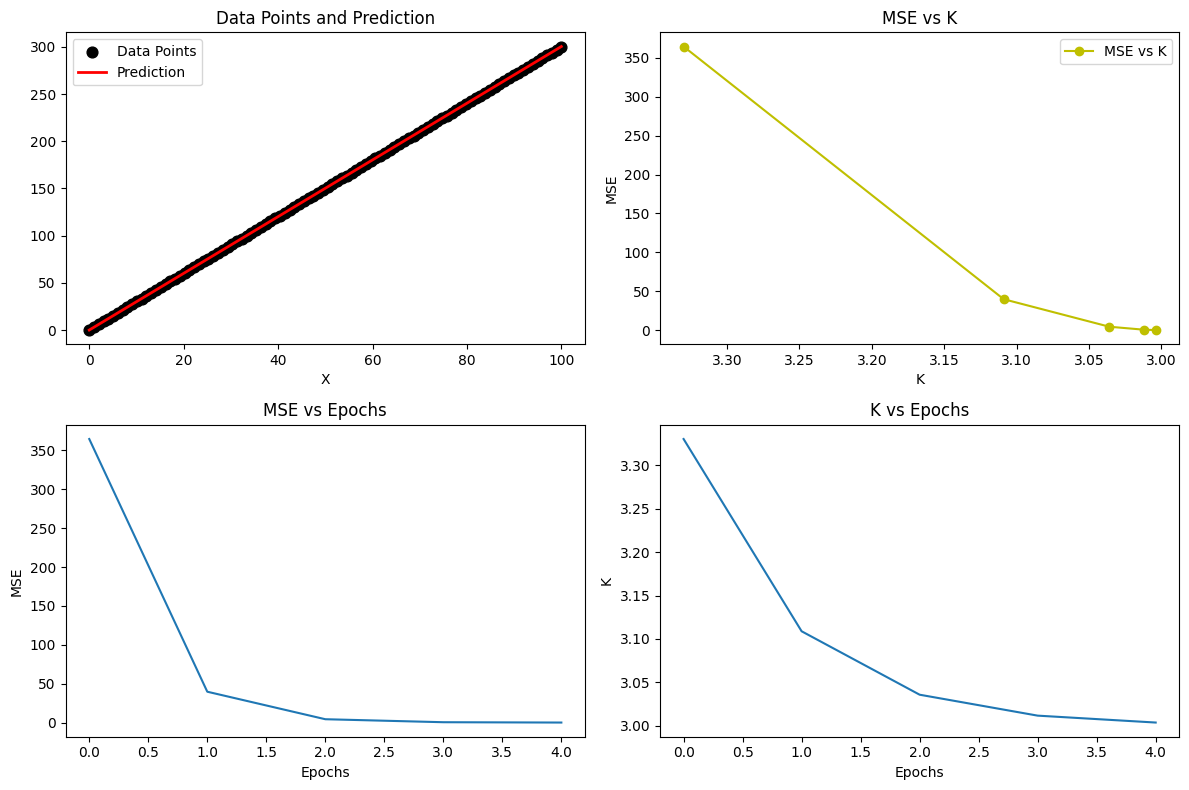

In [14]:
plt.close('all')
ax, fig = plt.subplots(2, 2, figsize=(12, 8))

y_real = y
y_pred = x * k

fig[0][0].scatter(x, y_real, label='Data Points', color="black", s=60)
fig[0][0].plot(x, y_pred, label='Prediction', color='red', linewidth=2)
fig[0][0].set_title('Data Points and Prediction')
fig[0][0].set_xlabel('X')
fig[0][0].legend()

fig[0][1].plot(history['k'], history['mse'], marker='o', linestyle='-', color='y', label='MSE vs K')
fig[0][1].set_title('MSE vs K')
fig[0][1].set_xlabel('K')
fig[0][1].set_ylabel('MSE')
fig[0][1].invert_xaxis()
fig[0][1].legend()


fig[1][0].plot(history['epochs'], history['mse'])
fig[1][0].set_title('MSE vs Epochs')
fig[1][0].set_xlabel('Epochs')
fig[1][0].set_ylabel('MSE')

fig[1][1].plot(history['epochs'], history['k'])
fig[1][1].set_title('K vs Epochs')
fig[1][1].set_xlabel('Epochs')
fig[1][1].set_ylabel('K')



plt.tight_layout()
plt.show()